In [14]:
import os
if "/content" in os.getcwd():
  !rm -rf WHere_codes/
  !git clone https://github.com/keenranger/WHere_codes
  os.chdir("/content/WHere_codes")
  !pip install -r requirements.txt
from PDR.modules.DataLoader import *
from PDR.modules.Walker import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.graph_objects as go

In [15]:
file_name = "five01"
pvloader = DataLoader("PDR/data/200626_h.db", file_name)
pvloader.DBLoader()
sensor_df = pvloader.sensor_df[["time", "accx", "accy", "accz", "gyrox", "gyroy",
                                "gyroz", "rot0", "rot1", "rot2", "rot3", "game0", "game1", "game2", "game3"]]
sensor_df.head()

Data parsing... 
Data parsing done!


time      accx      accy      accz     gyrox     gyroy     gyroz  \
0  1593156351516 -0.670348  3.090781  9.301074 -0.050391  0.718587 -0.118027   
1  1593156351536 -2.073289  3.129087  8.491868 -0.434014  0.383833  0.163582   
2  1593156351556 -1.673475  3.095570  9.059270 -0.500598  0.256773  0.363946   
3  1593156351576 -1.299996  3.291886  9.281921 -0.484105  0.177361  0.404874   
4  1593156351596 -1.122832  3.038111  9.961845 -0.430959  0.169420  0.343787   

       rot0      rot1      rot2      rot3     game0     game1     game2  \
0  0.152708  0.009742 -0.180525  0.971595  0.048551  0.145390  0.826951   
1  0.152675  0.017552 -0.179991  0.971589  0.039856  0.147505  0.827459   
2  0.149742  0.022069 -0.178317  0.972262  0.035192  0.145474  0.829322   
3  0.145808  0.025044 -0.174890  0.973410  0.031290  0.142824  0.832019   
4  0.140852  0.027483 -0.169766  0.974980  0.027462  0.139152  0.835330   

      game3  
0  0.540977  
1  0.540338  
2  0.538352  
3  0.535133  
4  0.531137

In [16]:
walker = Walker()
for row in tqdm(sensor_df.itertuples(), total=len(sensor_df)):
    walker.step(row[0], row[1], row[2:5], row[5:8], row[8:12], row[12:16])


100%|██████████| 20449/20449 [00:33<00:00, 615.25it/s]


In [17]:

displacement_df = pdr_to_displacement(walker.pdr_df)
position_df = displacement_df.cumsum()
print(walker.pdr_df)

length      body       nav       rot      game    fusion
0      0.65 -0.371877 -0.362427 -0.353553 -0.357313 -0.357313
1      0.65 -0.347043 -0.356868 -0.330850 -0.336993 -0.336993
2      0.65 -0.341180 -0.343811 -0.322085 -0.329832 -0.329832
3      0.65 -0.386466 -0.396390 -0.352133 -0.376755 -0.376755
4      0.65 -0.389174 -0.418586 -0.332608 -0.382343 -0.382343
..      ...       ...       ...       ...       ...       ...
787    0.65  2.662508 -2.010579 -2.030394 -1.203665 -1.203665
788    0.65  2.656654 -2.014151 -2.012271 -1.212171 -1.212171
789    0.65  2.669389 -2.011842 -1.978393 -1.202463 -1.202463
790    0.65  2.676324 -2.010480 -1.950802 -1.197687 -1.197687
791    0.65  2.690725 -1.997125 -1.927942 -1.183191 -1.183191

[792 rows x 6 columns]


In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=position_df['nav_x'],
    y=position_df['nav_y'],
    name="nav"))
fig.add_trace(go.Scatter(
    x=position_df['rot_x'], 
    y=position_df['rot_y'],
    name="rot"))
fig.add_trace(go.Scatter(
    x=position_df['game_x'], 
    y=position_df['game_y'],
    name="game"))
fig.update_layout(
    title="PDR",
    width = 800,
    height = 800,
    yaxis = dict(
      scaleanchor = "x",
      scaleratio = 1,
    )
)
fig.show()

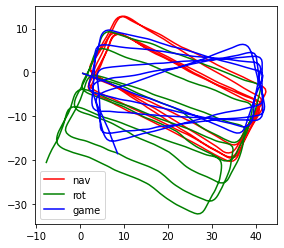

In [18]:
fig, ax = plt.subplots()
ax.plot(position_df['nav_x'],
        position_df['nav_y'], label="nav", c='r')
ax.plot(position_df['rot_x'],
        position_df['rot_y'], label="rot", c='g')
ax.plot(position_df['game_x'],
        position_df['game_y'], label="game", c='b')
ax.legend(loc='best')
ax.set_aspect('equal')

In [27]:
fig = go.Figure(data = go.Scatter(x=walker.headingcalc.heading_df['time'], y=np.rad2deg(walker.headingcalc.heading_df['nav']),name="nav"))
fig.add_trace(go.Scatter(x=walker.headingcalc.heading_df['time'], y=np.rad2deg(walker.headingcalc.heading_df['rot']),name="rot"))
fig.add_trace(go.Scatter(x=walker.headingcalc.heading_df['time'], y=np.rad2deg(walker.headingcalc.heading_df['game']),name="game"))
fig.show()